In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
airlines = pd.read_excel("Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)
airlines

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [3]:
# EDA

airlines.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [4]:
airlines[airlines.duplicated]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


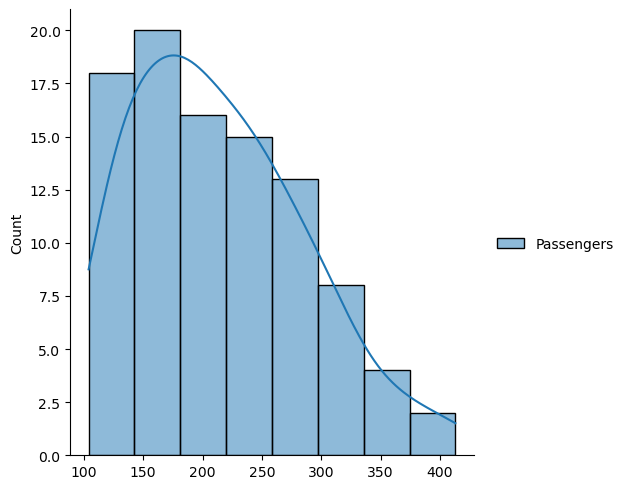

In [5]:
import seaborn as sns

sns.displot(airlines, kde=True)

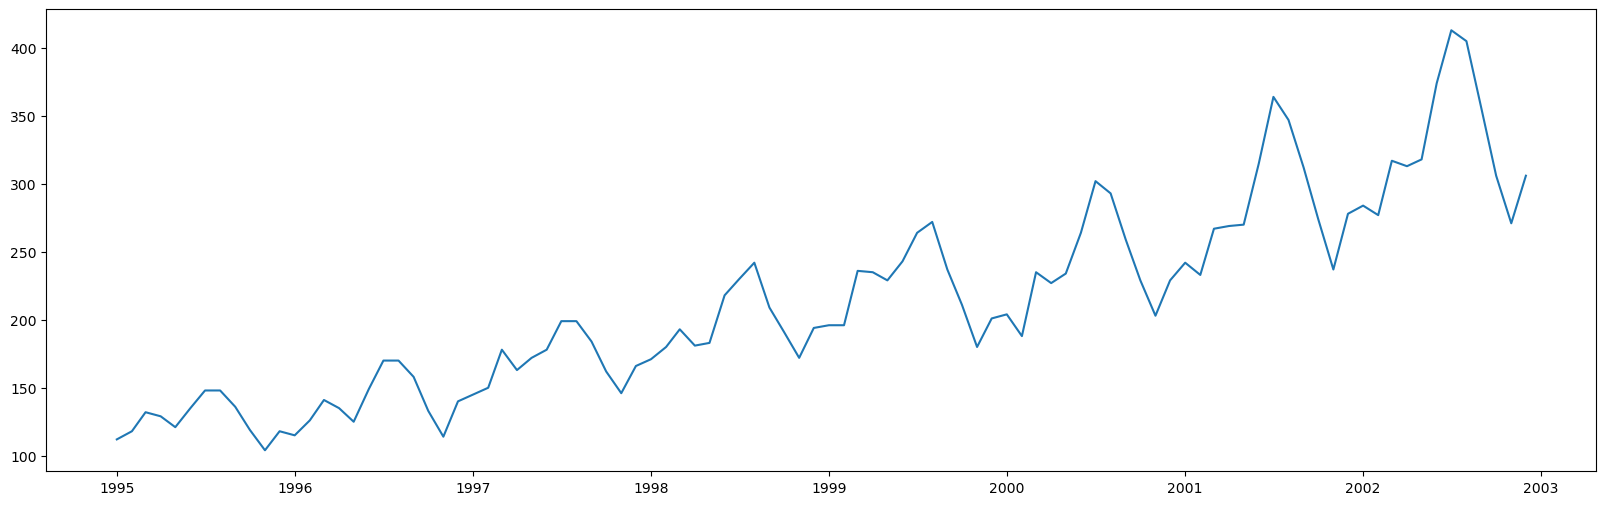

In [6]:
plt.figure(figsize=(20,6))
plt.plot(airlines)

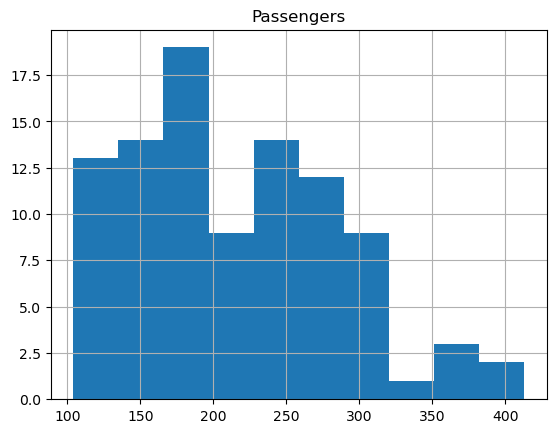

In [7]:
airlines.hist()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x166d5a85190>,
 'caps': [<matplotlib.lines.Line2D at 0x166d5a87fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x166d5a84750>],
 'medians': [<matplotlib.lines.Line2D at 0x166d5a88ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x166d5a8a850>],
 'means': []}

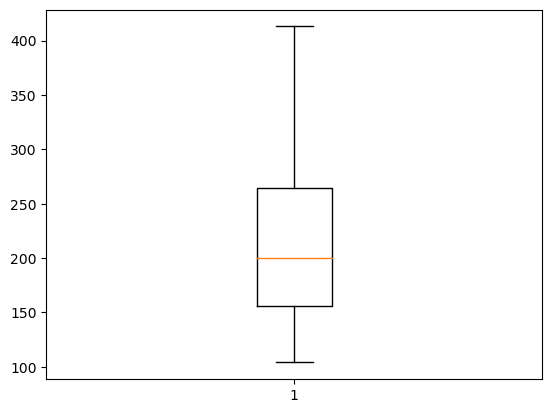

In [8]:
plt.boxplot(airlines)

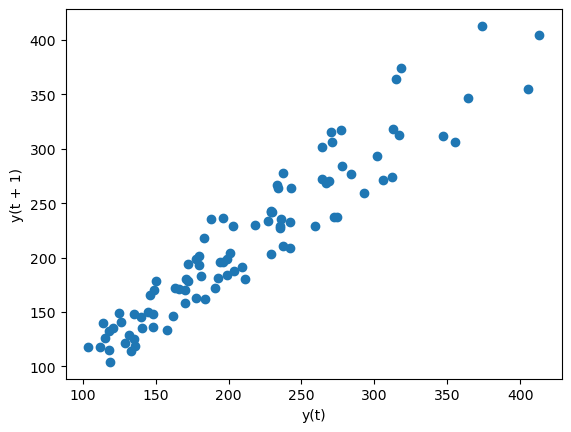

In [9]:
lag_plot(airlines['Passengers'])
plt.show()

<Axes: xlabel='Month', ylabel='Passengers'>

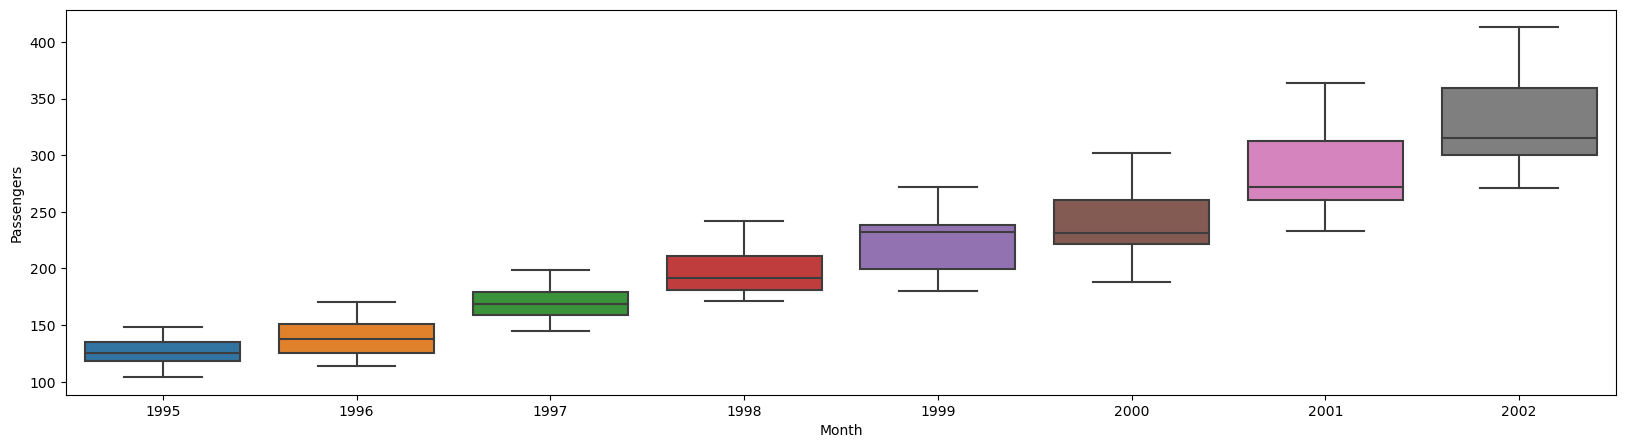

In [10]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = airlines.index.year, 
            y = airlines.Passengers, 
            ax = ax) 

<Axes: xlabel='Month', ylabel='Passengers'>

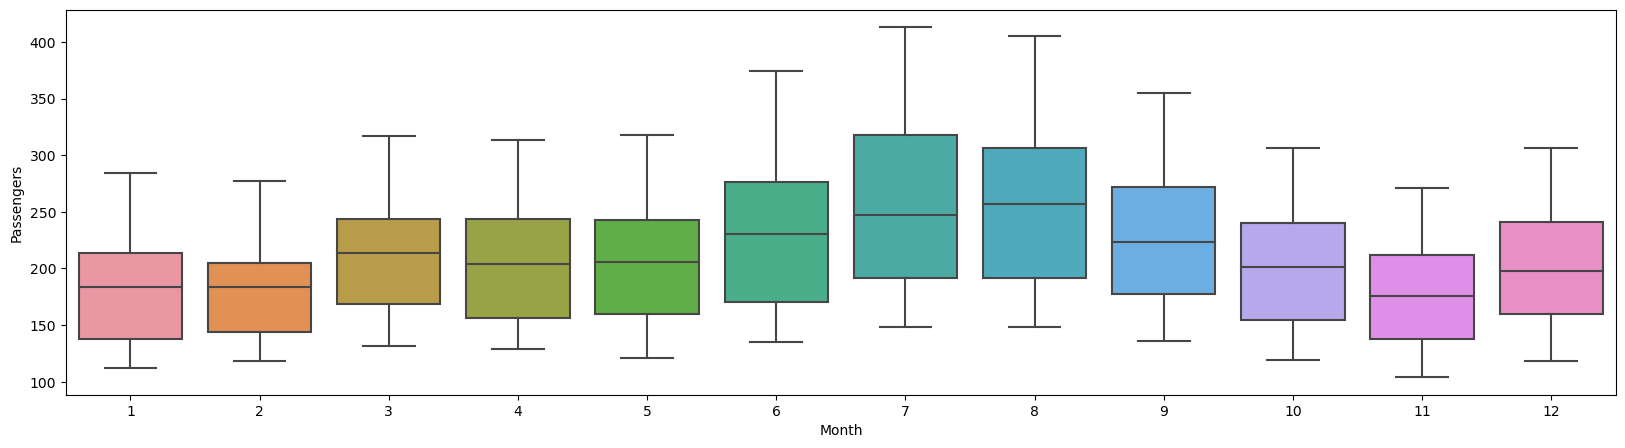

In [11]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = airlines.index.month, 
            y = airlines.Passengers, 
            ax = ax) 

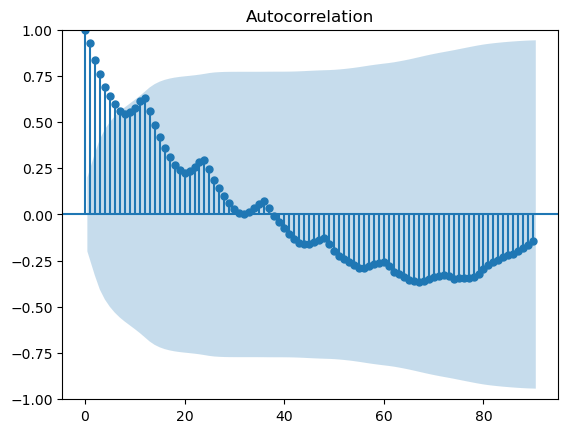

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(airlines,lags=90)
plt.show()

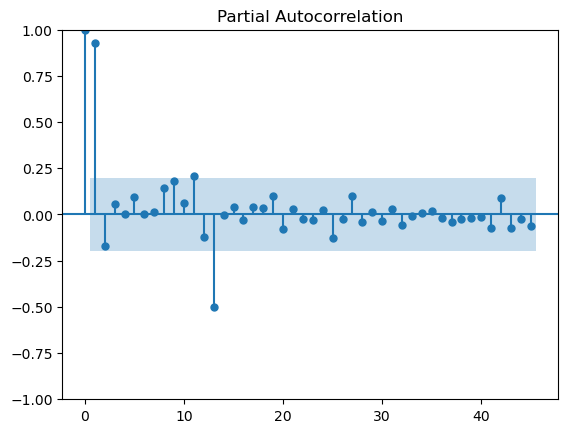

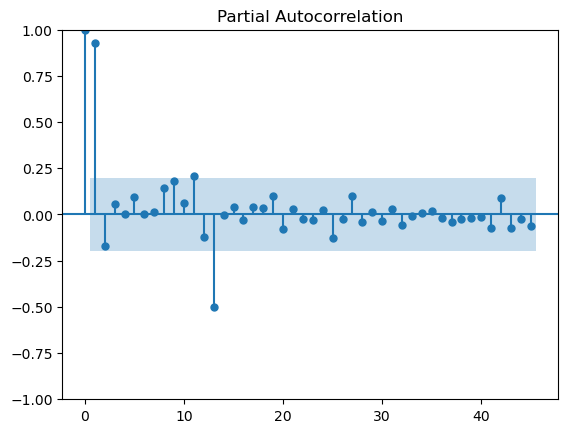

In [13]:
plot_pacf(airlines,lags=45)

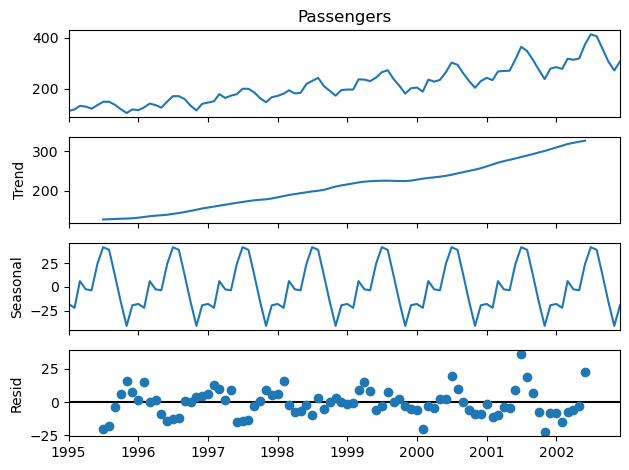

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(airlines.Passengers)
decompose_ts_add.plot()
plt.show()

In [15]:
# ARIMA

# Augmented Dickey-Fuller (ADF) test

# import the adfuller function from statsmodel package to perform ADF test
from statsmodels.tsa.stattools import adfuller

# extracting values from data frame
values = airlines.values

# passing the extracted values to adfuller function.
res = adfuller(values)

# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f'  %res[1])

# printing the critical values at different alpha levels and the result of the test.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))
if (res[1] > 0.025):
    print("The time series is non-stationary")

Augmneted Dickey_fuller Statistic: 1.340248
p-value: 0.996825
critical values at different levels:
	1%: -3.512
	5%: -2.897
	10%: -2.586
The time series is non-stationary


p value:0.22488942647512306 , Series is Non-Stationary


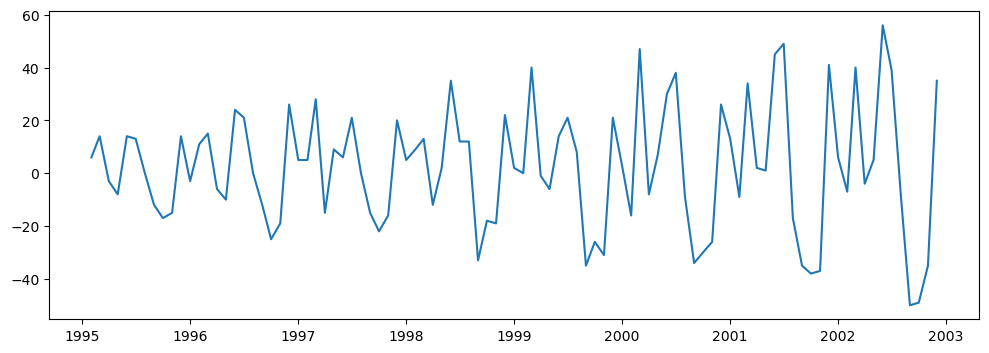

In [16]:
#De-trending with first order differencing

data1 = pd.DataFrame(airlines["Passengers"].diff())
de_trended = data1.dropna()
adf2 = adfuller(de_trended.values)[1]
print(f"p value:{adf2}", ", Series is Stationary" if adf2 <0.05 else ", Series is Non-Stationary")
plt.figure(figsize = (12,4))
plt.plot(de_trended);
plt.show()

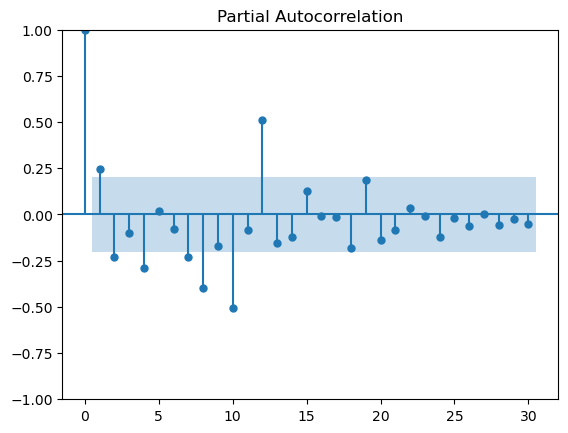

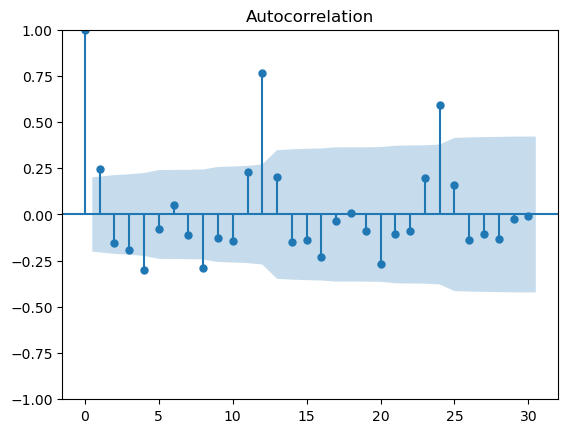

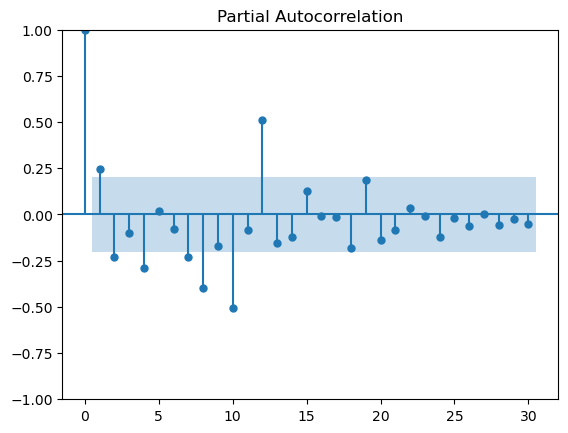

In [17]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(de_trended.values,lags=30)
tsa_plots.plot_pacf(de_trended.values,lags=30)

In [18]:
# p=1, d=1, q=1

In [19]:
# separate out a validation dataset

split_point = len(airlines) - 20
train, validation = airlines[0:split_point], airlines[split_point:]
print('Dataset %d, Validation %d' % (len(train), len(validation)))
train.to_csv('airlines_dataset.csv', header=True)
validation.to_csv('airlines_validation.csv', header=True)

Dataset 76, Validation 20


In [20]:
X = train.values
X = X.astype('float32')

In [21]:
validation

,Passengers
Month,
2001-05-01,270
2001-06-01,315
2001-07-01,364
2001-08-01,347
2001-09-01,312
2001-10-01,274
2001-11-01,237
2001-12-01,278
2002-01-01,284


In [22]:
# fit model

model = ARIMA(X, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=20)
forecast

array([262.94663198, 267.39576189, 264.12572166, 266.52914959,
       264.76266802, 266.06100408, 265.10674758, 265.80811104,
       265.29261997, 265.67149776, 265.39302857, 265.59769903,
       265.44726947, 265.55783282, 265.4765705 , 265.53629702,
       265.49239897, 265.52466335, 265.50094954, 265.51837881])

In [23]:
test = pd.read_csv("airlines_validation.csv")
test

,Month,Passengers
0,2001-05-01,270
1,2001-06-01,315
2,2001-07-01,364
3,2001-08-01,347
4,2001-09-01,312
5,2001-10-01,274
6,2001-11-01,237
7,2001-12-01,278
8,2002-01-01,284
9,2002-02-01,277


In [24]:
test["forecast"]=forecast

In [25]:
test

,Month,Passengers,forecast
0,2001-05-01,270,262.946632
1,2001-06-01,315,267.395762
2,2001-07-01,364,264.125722
3,2001-08-01,347,266.529150
4,2001-09-01,312,264.762668
5,2001-10-01,274,266.061004
6,2001-11-01,237,265.106748
7,2001-12-01,278,265.808111
8,2002-01-01,284,265.292620
9,2002-02-01,277,265.671498


In [26]:
#Error on the test data

val=pd.read_csv('airlines_validation.csv')
rmse = np.sqrt(mean_squared_error(val.Passengers, forecast))
rmse

68.71738154734777

In [27]:
# Combine train and test data and build final model

data = pd.read_excel("Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)

# prepare data
X = data.values
print(X[0:5])
print(X.dtype)

[[112]
 [118]
 [132]
 [129]
 [121]]
int64


In [28]:
X = X.astype('float32')

In [29]:
model = ARIMA(X, order=(1,1,1))
model_fit = model.fit()

In [30]:
forecast=model_fit.forecast(steps=5)
forecast

array([324.0267461 , 315.33476105, 319.52578941, 317.50499455,
       318.47936445])

In [31]:
forecastdata = pd.DataFrame()
forecastdata["forecasted_val"] = forecast

In [32]:
forecastdata

,forecasted_val
0,324.026746
1,315.334761
2,319.525789
3,317.504995
4,318.479364


In [33]:
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [34]:
airline_passengers = pd.concat([data,forecastdata], ignore_index=True)

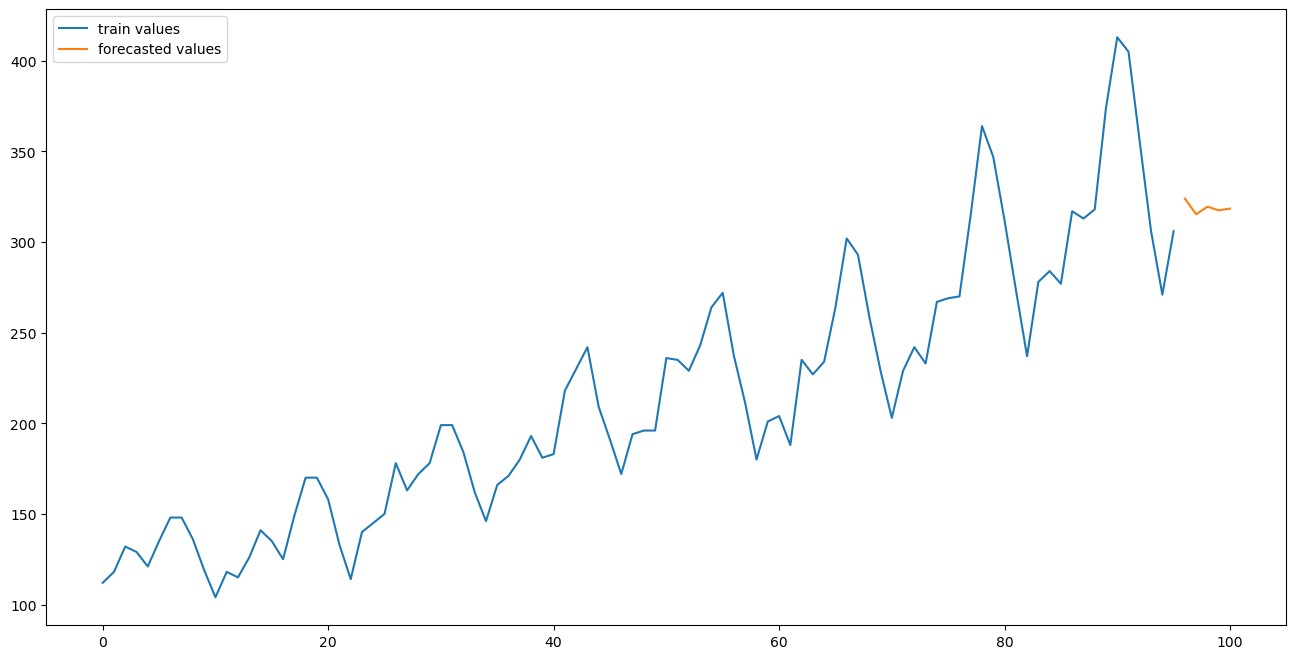

In [35]:
plt.figure(figsize=(16,8))

plt.plot(airline_passengers["Passengers"], label='train values')
plt.plot(airline_passengers["forecasted_val"], label="forecasted values")
plt.legend(loc='best')
plt.show()

In [40]:
airlines.columns

Index(['Passengers'], dtype='object')

In [41]:
airlines.reset_index(inplace=True)

In [42]:
airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [43]:
airlines["month"] = airlines.Month.dt.strftime("%b")

In [46]:
airlines['t']=np.arange(1,len(airlines)+1)
airlines['t_square']=airlines['t']**2
airlines['log_passangers']=np.log(airlines['Passengers'])
airlines_OHE=pd.get_dummies(airlines,columns=['month'])
airlines_OHE.head()

,Month,Passengers,t,t_square,log_passangers,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


In [48]:
airlines_OHE=airlines_OHE.rename({'month_Apr':'Apr','month_Aug':'Aug','month_Dec':'Dec','month_Feb':'Feb','month_Jan':'Jan','month_Jul':'Jul',
'month_Jun':'Jun','month_Mar':'Mar','month_May':'May','month_Nov':'Nov','month_Oct':'Oct','month_Sep':'Sep'},axis=1)

In [49]:
airlines_OHE.head()

,Month,Passengers,t,t_square,log_passangers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


In [50]:
train1 = airlines_OHE.head(86)
test1 = airlines_OHE.tail(10)

In [59]:
airlines_OHE.shape

(96, 17)

In [56]:
train1.tail()

,Month,Passengers,t,t_square,log_passangers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
81,2001-10-01,274,82,6724,5.613128,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,83,6889,5.468060,0,0,0,0,0,0,0,0,0,1,0,0
83,2001-12-01,278,84,7056,5.627621,0,0,1,0,0,0,0,0,0,0,0,0
84,2002-01-01,284,85,7225,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,86,7396,5.624018,0,0,0,1,0,0,0,0,0,0,0,0


In [57]:
test1.head()

,Month,Passengers,t,t_square,log_passangers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
86,2002-03-01,317,87,7569,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,88,7744,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,89,7921,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,90,8100,5.924256,0,0,0,0,0,0,1,0,0,0,0,0
90,2002-07-01,413,91,8281,6.023448,0,0,0,0,0,1,0,0,0,0,0,0


In [60]:
#linear model
linear_model=smf.ols('Passengers~t',data=train1).fit()
linear_pred=linear_model.predict(test1['t'])
linear_rmse=np.sqrt(mean_squared_error(test1['Passengers'],linear_pred))
linear_rmse

58.643149727782514

In [61]:
#quadratic
quad_model=smf.ols('Passengers~t+t_square',data=train1).fit()
quad_pred=quad_model.predict(test1[['t','t_square']])
quad_rmse=np.sqrt(mean_squared_error(test1['Passengers'],quad_pred))
quad_rmse

53.914363578525986

In [62]:
#exponential
expo_model=smf.ols('log_passangers~t',data=train1).fit()
expo_pred=expo_model.predict(test1['t'])
expo_rmse=np.sqrt(mean_squared_error(test1['log_passangers'],expo_pred))
expo_rmse

0.14475099238167136

In [63]:
#additive sea
add_seas_model=smf.ols('Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train1).fit()
add_seas_pred=add_seas_model.predict(test1[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])
add_seas_rmse=np.sqrt(mean_squared_error(test1['Passengers'],add_seas_pred))
add_seas_rmse

136.7901043681932

In [64]:
#Additive Seasonality Quadratic
add_seas_quad_model=smf.ols('Passengers~t+t_square+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train1).fit()
add_seas_quad_pred=add_seas_quad_model.predict(test1[['t','t_square','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])
add_seas_quad_rmse=np.sqrt(mean_squared_error(test1['Passengers'],add_seas_quad_pred))
add_seas_quad_rmse

29.104549899233714

In [65]:
##Multiplicative Seasonality
mul_seas_model=smf.ols('log_passangers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train1).fit()
mul_seas_pred=mul_seas_model.predict(test1[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])
mul_seas_rmse=np.sqrt(mean_squared_error(test1['log_passangers'],mul_seas_pred))
mul_seas_rmse

0.5456837864857784

In [66]:
#Multiplicative quadratic Seasonality
mul_seas_quad_model=smf.ols('log_passangers~t+t_square+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train1).fit()
mul_seas_quad_pred=mul_seas_quad_model.predict(test1[['t','t_square','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']])
mul_seas_quad_rmse=np.sqrt(mean_squared_error(test1['log_passangers'],mul_seas_quad_pred))
mul_seas_quad_rmse

0.05079675316352988

In [67]:
data={"MODEL":pd.Series(['linear model','quadratic','Exponential','additive sea',
                        'Additive Seasonality Quadratic' ,'Multiplicative Seasonality','Multiplicative quadratic Seasonality']),
      "RMSE SCORE":pd.Series([linear_rmse,quad_rmse,expo_rmse,add_seas_rmse,add_seas_quad_rmse,mul_seas_rmse,mul_seas_quad_rmse])}
data_rmse=pd.DataFrame(data)
data_rmse

,MODEL,RMSE SCORE
0,linear model,58.643150
1,quadratic,53.914364
2,Exponential,0.144751
3,additive sea,136.790104
4,Additive Seasonality Quadratic,29.104550
5,Multiplicative Seasonality,0.545684
6,Multiplicative quadratic Seasonality,0.050797
